In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Importing Dataset

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname(__file__), '.env')
load_dotenv(dotenv_path)

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=os.environ.get("SECRET_KEY")  ,
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'machinelearningbasedvehicleperfor-donotdelete-pr-r4bnhfo0kkioj3'
object_key = 'car performance.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head(6)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


# Finding missing data

In [8]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

There are no null characters in the columns but there is a special character '?' in the 'horsepower' column. So we we replaced '?' with nan and replaced nan values with mean of the column.

In [9]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)


In [10]:
dataset['horsepower'].isnull().sum()

6

In [11]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [12]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [13]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [14]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [15]:
dataset.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


There is no use with car name attribute so drop it

In [16]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.

In [17]:
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


# Data Visualizations

Heatmap : which represents correlation between attributes

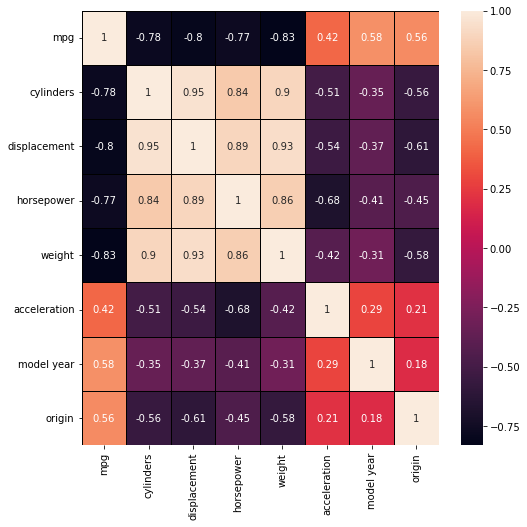

In [18]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Visualizations of each attributes w.r.t rest of all attributes

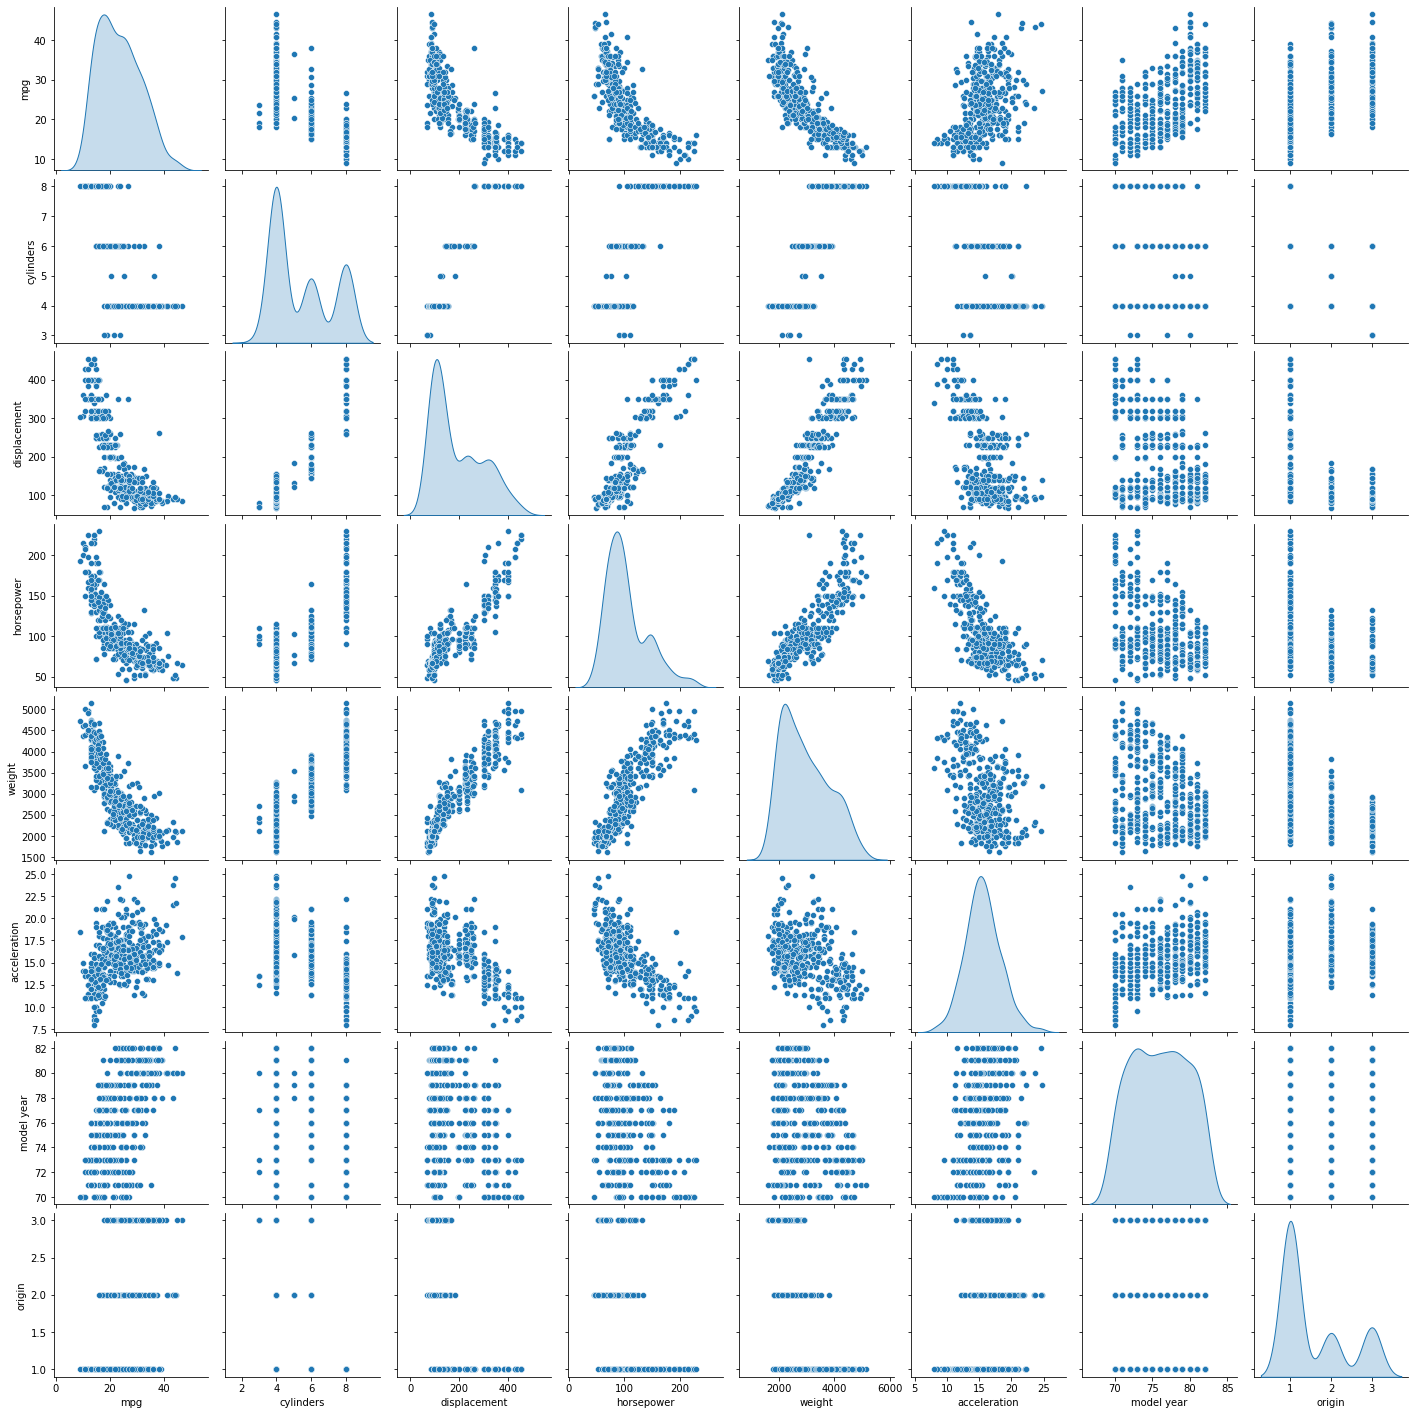

In [19]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationships.

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

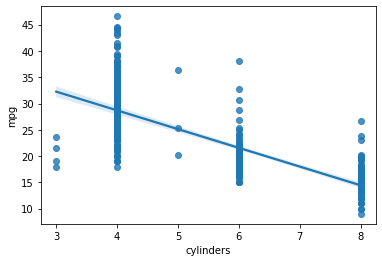

In [20]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

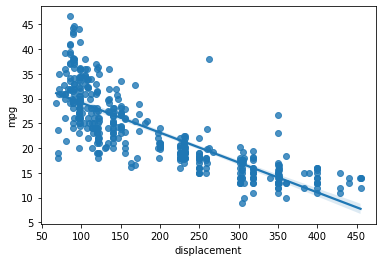

In [21]:
sns.regplot(x="displacement", y="mpg", data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

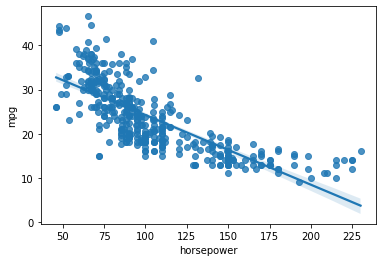

In [22]:
sns.regplot(x="horsepower", y="mpg", data=dataset)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

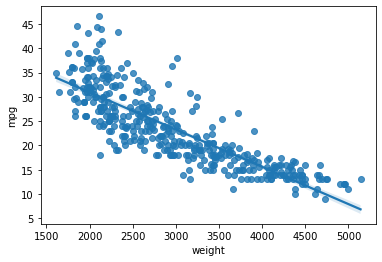

In [23]:
sns.regplot(x="weight", y="mpg", data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

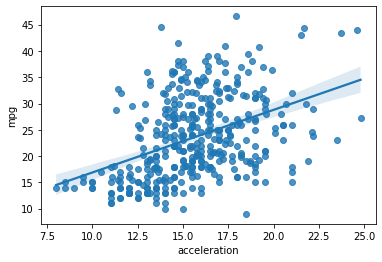

In [24]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

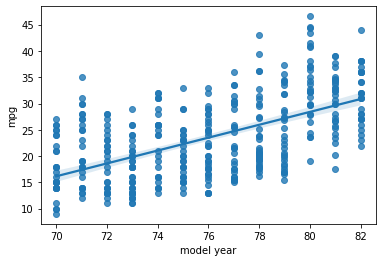

In [25]:
sns.regplot(x="model year", y="mpg", data=dataset)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

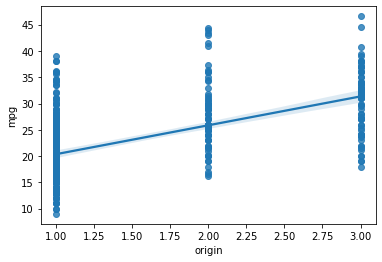

In [26]:
sns.regplot(x="origin", y="mpg", data=dataset)

<AxesSubplot:xlabel='mpg'>

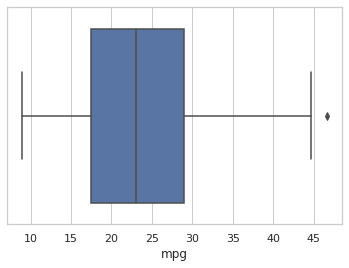

In [27]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

Finding quartiles for mgp

# The P-value is the probability value that the correlation between these two variables is statistically significant. 
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between 
the variables is significant.

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [28]:
from scipy import stats

<h3>Cylinders vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'Cylinders' and 'mpg'.

In [29]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

<h3>Displacement vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'Displacement' and 'mpg'.

In [30]:
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8042028248058978  with a P-value of P = 1.6558889101930157e-91


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.1, the correlation between displacement and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.809, close to -1)</p>

<h3>Horsepower vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'mpg'.

In [31]:
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7714371350025526  with a P-value of P = 9.255477533166725e-80


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.771 shows that the relationship is negative and moderately strong.

<h3>Weight vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'weight' and 'mpg'.

In [32]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between weight and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.831, close to -1)</p>

<h3>Acceleration vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'Acceleration' and 'mpg'.

In [33]:
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


<h5>Conclusion:</h5>
<p>Since the p-value is $>$ 0.1, the correlation between acceleration and mpg is statistically significant, but the linear relationship is weak (~0.420).</p>

<h3>Model year vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'Model year' and 'mpg'.

In [34]:
pearson_coef, p_value = stats.pearsonr(dataset['model year'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between model year and mpg is statistically significant, but the linear relationship is only moderate (~0.579).</p>

<h3>Origin vs mpg</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'Origin' and 'mpg'.

In [35]:
pearson_coef, p_value = stats.pearsonr(dataset['origin'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between origin and mpg is statistically significant, but the linear relationship is only moderate (~0.563).</p>

<b>Ordinary Least Squares</b>  Statistics

In [36]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          4.84e-104
Time:                        06:48:49   Log-Likelihood:                -1131.1
No. Observations:                 398   AIC:                             2276.
Df Residuals:                     391   BIC:                             2304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.7111      2.693     15.861      0.000      37.417      48.005
cylinders       -0.5256      0.404     -1.302      0.194      -1.320       0.268
displacement     0.0106      0.009      1.133      0.258      -0.008       0.029
horsepower      -0.0529      0.016     -3.277      0.001      -0.085      -0.021
weight          -0.0051      0.001     -6.441      0.000      -0.007      -0.004
acceleration     0.0043      0.120      0.036      0.972      -0.232       0.241
origin           1.4269      0.345      4.136      0.000       0.749       2.105
==============================================================================
Omnibus:                       32.659   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.338
Skew:                           0.624   Prob(JB):                     3.88e-10
Kurtosis:                       4.028   Cond. No.                     3.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference as in the above summary the p value of the accelaration is maximum(i.e 0.972) so we can remove the acc variable from the dataset


# Seperating into Dependent and Independent variables

<b>Independent variables</b>

In [37]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

<b>Dependent variables</b>

In [38]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

# Splitting into train and test data.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

we are splitting as 90% train data and 10% test data

# Normalisation

In [41]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
y_train = sd.fit_transform(y_train)
y_test = sd.fit_transform(y_test)

x_train

array([[ 1.46858608,  2.48230464,  2.97856512,  1.62455076, -1.61295698,
        -0.71873488],
       [ 1.46858608,  1.48729292,  1.55429873,  0.84358808, -1.61295698,
        -0.71873488],
       [-0.86550411, -0.70364636, -0.64684023, -0.36507278,  0.82235108,
        -0.71873488],
       ...,
       [-0.86550411, -1.21071964, -1.44960856, -1.31380657, -0.80118763,
         0.53032865],
       [ 0.30154098,  0.53055088, -0.12892518,  0.35799706, -1.3423672 ,
        -0.71873488],
       [-0.86550411, -1.00023639, -0.87990201, -0.89319732, -0.26000806,
         0.53032865]])